In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Python(50293) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


## Import data

In [2]:
df = pd.read_csv('fraudTrain.csv')
df.set_index(df.columns[0], inplace=True)
df.index.name = None
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# number of rows
print(df.shape[0])

1296675


In [4]:
# List all cols
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
# Number of unique cc_num
df['cc_num'].nunique()

983

In [6]:
# Ensure 'trans_date_trans_time' is in datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Sort the DataFrame by 'cc_num' and 'trans_date_trans_time'
df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)

# Group by 'cc_num' and calculate the time difference
df['last_purchased'] = df.groupby('cc_num')['trans_date_trans_time'].diff()

# For the first transaction for each 'cc_num', set 'last_purchased' to NaT
df['last_purchased'] = df['last_purchased'].fillna(pd.NaT)

# Display the DataFrame to verify the changes
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,last_purchased
1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,-108.8964,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.974711,-109.741904,0,NaT
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,-108.8964,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.018766,-109.044172,0,0 days 19:57:42
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,-108.8964,1645,Information systems manager,1986-02-17,95f514bb993151347c7acdf8505c3d62,1325494056,42.961335,-109.157564,0,0 days 00:02:39
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,-108.8964,1645,Information systems manager,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1325507894,42.228227,-108.747683,0,0 days 03:50:38
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,-108.8964,1645,Information systems manager,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1325509846,43.321745,-108.091143,0,0 days 00:32:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,2020-06-20 21:04:59,4992346398065154184,"fraud_Berge, Kautzer and Harris",personal_care,60.47,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,-89.2187,532,Audiological scientist,1956-01-09,ad7dfdf0aaa36cd7985dd1f35ca0e2fc,1371762299,40.475395,-89.076105,0,0 days 08:32:20
1295369,2020-06-21 00:41:01,4992346398065154184,fraud_Bernhard Inc,gas_transport,74.29,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,-89.2187,532,Audiological scientist,1956-01-09,6d427d735c9f9b2fd480f2c24b6525de,1371775261,40.743634,-89.553379,0,0 days 03:36:02
1295587,2020-06-21 02:47:59,4992346398065154184,"fraud_Reichert, Rowe and Mraz",shopping_net,246.56,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,-89.2187,532,Audiological scientist,1956-01-09,9814049bcc69fb31d81f4a907f2fe255,1371782879,40.215418,-88.682562,0,0 days 02:06:58
1296206,2020-06-21 08:04:28,4992346398065154184,fraud_Jewess LLC,shopping_pos,2.62,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,-89.2187,532,Audiological scientist,1956-01-09,ae39b91cd2b4897ddbbf6bf63d3e7b03,1371801868,40.762861,-88.744967,0,0 days 05:16:29


In [7]:
df.dtypes

trans_date_trans_time     datetime64[ns]
cc_num                             int64
merchant                          object
category                          object
amt                              float64
first                             object
last                              object
gender                            object
street                            object
city                              object
state                             object
zip                                int64
lat                              float64
long                             float64
city_pop                           int64
job                               object
dob                               object
trans_num                         object
unix_time                          int64
merch_lat                        float64
merch_long                       float64
is_fraud                           int64
last_purchased           timedelta64[ns]
dtype: object

In [8]:
import pandas as pd
import numpy as np

# Ensure 'trans_date_trans_time' is in datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Sort the DataFrame by 'cc_num' and 'trans_date_trans_time'
df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)

# Group by 'cc_num' and calculate the time difference
df['last_purchased'] = df.groupby('cc_num')['trans_date_trans_time'].diff()

# For the first transaction for each 'cc_num', set 'last_purchased' to NaT
df['last_purchased'] = df['last_purchased'].fillna(pd.NaT)

# Define the Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate the distance to the last purchase
df['last_merch_lat'] = df.groupby('cc_num')['merch_lat'].shift()
df['last_merch_long'] = df.groupby('cc_num')['merch_long'].shift()

df['distance_last_purchase'] = haversine(df['merch_lat'], df['merch_long'], df['last_merch_lat'], df['last_merch_long'])

# For the first transaction for each 'cc_num', set 'distance_last_purchase' to NaN (this is in km)
df['distance_last_purchase'] = df['distance_last_purchase'].fillna(np.nan)

# Drop the temporary columns
df.drop(columns=['last_merch_lat', 'last_merch_long'], inplace=True)

# Display the DataFrame to verify the changes
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,last_purchased,distance_last_purchase
1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.974711,-109.741904,0,NaT,NaN
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.018766,-109.044172,0,0 days 19:57:42,224.769219
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1645,Information systems manager,1986-02-17,95f514bb993151347c7acdf8505c3d62,1325494056,42.961335,-109.157564,0,0 days 00:02:39,105.220439
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1645,Information systems manager,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1325507894,42.228227,-108.747683,0,0 days 03:50:38,88.152283
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1645,Information systems manager,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1325509846,43.321745,-108.091143,0,0 days 00:32:32,132.876773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,2020-06-20 21:04:59,4992346398065154184,"fraud_Berge, Kautzer and Harris",personal_care,60.47,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,532,Audiological scientist,1956-01-09,ad7dfdf0aaa36cd7985dd1f35ca0e2fc,1371762299,40.475395,-89.076105,0,0 days 08:32:20,72.133978
1295369,2020-06-21 00:41:01,4992346398065154184,fraud_Bernhard Inc,gas_transport,74.29,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,532,Audiological scientist,1956-01-09,6d427d735c9f9b2fd480f2c24b6525de,1371775261,40.743634,-89.553379,0,0 days 03:36:02,50.128232
1295587,2020-06-21 02:47:59,4992346398065154184,"fraud_Reichert, Rowe and Mraz",shopping_net,246.56,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,532,Audiological scientist,1956-01-09,9814049bcc69fb31d81f4a907f2fe255,1371782879,40.215418,-88.682562,0,0 days 02:06:58,94.203913
1296206,2020-06-21 08:04:28,4992346398065154184,fraud_Jewess LLC,shopping_pos,2.62,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,...,532,Audiological scientist,1956-01-09,ae39b91cd2b4897ddbbf6bf63d3e7b03,1371801868,40.762861,-88.744967,0,0 days 05:16:29,61.101214


In [9]:
def process_fraud_data(df):
    # Create a copy of the input DataFrame to avoid modifying the original data
    df_copy = df.copy()

    # Ensure 'trans_date_trans_time' is in datetime format
    df_copy['trans_date_trans_time'] = pd.to_datetime(df_copy['trans_date_trans_time'])
    df_copy['unix_time'] = pd.to_datetime(df_copy['unix_time'], unit='s')

    # Get month of year, day of week, and hour of day for transactions
    df_copy['trans_day_of_week'] = df_copy['trans_date_trans_time'].dt.day_name()
    df_copy['trans_month'] = df_copy['trans_date_trans_time'].dt.month_name()

    # Create 'time_of_day' column
    df_copy['time_of_day'] = (df_copy['trans_date_trans_time'].dt.hour * 60 + df_copy['trans_date_trans_time'].dt.minute) / (24 * 60)

    # Calculate age in years
    df_copy['dob'] = pd.to_datetime(df_copy['dob'])
    df_copy['age'] = df_copy['trans_date_trans_time'].dt.year - df_copy['dob'].dt.year - (
        (df_copy['trans_date_trans_time'].dt.month < df_copy['dob'].dt.month) |
        ((df_copy['trans_date_trans_time'].dt.month == df_copy['dob'].dt.month) & (df_copy['trans_date_trans_time'].dt.day < df_copy['dob'].dt.day))
    )

    # Sort the DataFrame by 'cc_num' and 'trans_date_trans_time'
    df_copy.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)

    # Group by 'cc_num' and calculate the time difference
    df_copy['last_purchased'] = df_copy.groupby('cc_num')['trans_date_trans_time'].diff()

    # For the first transaction for each 'cc_num', set 'last_purchased' to NaT
    df_copy['last_purchased'] = df_copy['last_purchased'].fillna(pd.NaT)

    # Convert 'last_purchased' to numerical format (total number of seconds)
    df_copy['last_purchased_secs'] = df_copy['last_purchased'].dt.total_seconds()

    # Define the Haversine distance function
    def haversine(lat1, lon1, lat2, lon2):
        R = 6371  # Radius of the Earth in kilometers
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        return R * c

    # Calculate the distance to the last purchase
    df_copy['last_merch_lat'] = df_copy.groupby('cc_num')['merch_lat'].shift()
    df_copy['last_merch_long'] = df_copy.groupby('cc_num')['merch_long'].shift()

    df_copy['distance_last_purchase'] = haversine(df_copy['merch_lat'], df_copy['merch_long'], df_copy['last_merch_lat'], df_copy['last_merch_long'])

    # For the first transaction for each 'cc_num', set 'distance_last_purchase' to NaN
    df_copy['distance_last_purchase'] = df_copy['distance_last_purchase'].fillna(np.nan)

    # Create 'same_merchant_with_last_purchase' column
    df_copy['last_merchant'] = df_copy.groupby('cc_num')['merchant'].shift()
    df_copy['same_merchant_with_last_purchase'] = (df_copy['merchant'] == df_copy['last_merchant'])

    # Drop the temporary columns
    df_copy.drop(columns=['last_merch_lat', 'last_merch_long', 'last_merchant'], inplace=True)

    # Drop the specified columns
    df_copy.drop(columns=['last_purchased', 'city', 'street', 'last', 'first', 'job', 'cc_num', 'merchant', 'trans_date_trans_time', 'state', 'zip', 'lat', 'long', 'merch_lat', 'merch_long', 'trans_num', 'unix_time', 'dob'], inplace=True)

    # Sort the DataFrame by the original index to maintain the original order
    df_copy.sort_index(inplace=True)

    return df_copy

In [10]:
df_test = pd.read_csv('fraudTest.csv', index_col=0)
df_test

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [11]:
# Example usage:
processed_df_test = process_fraud_data(df_test)
processed_df_test.head()

,category,amt,gender,city_pop,is_fraud,trans_day_of_week,trans_month,time_of_day,age,last_purchased_secs,distance_last_purchase,same_merchant_with_last_purchase
0,personal_care,2.86,M,333497,0,Sunday,June,0.509722,52,NaN,NaN,False
1,personal_care,29.84,F,302,0,Sunday,June,0.509722,30,NaN,NaN,False
2,health_fitness,41.28,F,34496,0,Sunday,June,0.509722,49,NaN,NaN,False
3,misc_pos,60.05,M,54767,0,Sunday,June,0.510417,32,NaN,NaN,False
4,travel,3.19,M,1126,0,Sunday,June,0.510417,64,NaN,NaN,False


In [12]:
df_train = pd.read_csv('fraudTrain.csv', index_col=0)
processed_df_train = process_fraud_data(df_train)
processed_df_train

,category,amt,gender,city_pop,is_fraud,trans_day_of_week,trans_month,time_of_day,age,last_purchased_secs,distance_last_purchase,same_merchant_with_last_purchase
0,misc_net,4.97,F,3495,0,Tuesday,January,0.000000,30,NaN,NaN,False
1,grocery_pos,107.23,F,149,0,Tuesday,January,0.000000,40,NaN,NaN,False
2,entertainment,220.11,M,4154,0,Tuesday,January,0.000000,56,NaN,NaN,False
3,gas_transport,45.00,M,1939,0,Tuesday,January,0.000694,51,NaN,NaN,False
4,misc_pos,41.96,M,99,0,Tuesday,January,0.002083,32,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,258,0,Sunday,June,0.508333,58,16781.0,112.032046,False
1296671,food_dining,51.70,M,100,0,Sunday,June,0.508333,40,7962.0,94.988187,False
1296672,food_dining,105.93,M,899,0,Sunday,June,0.508333,52,29074.0,177.104191,False
1296673,food_dining,74.90,M,1126,0,Sunday,June,0.509028,39,91018.0,118.969517,False


## EDA

In [13]:
processed_df_train.describe()

,amt,city_pop,is_fraud,time_of_day,age,last_purchased_secs,distance_last_purchase
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.295692e+06,1.295692e+06
mean,7.035104e+01,8.882444e+04,5.788652e-03,5.540186e-01,4.549688e+01,3.248502e+04,1.035944e+02
std,1.603160e+02,3.019564e+05,7.586269e-02,2.843231e-01,1.739702e+01,4.740098e+04,5.039868e+01
min,1.000000e+00,2.300000e+01,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,8.069198e-02
25%,9.650000e+00,7.430000e+02,0.000000e+00,3.180556e-01,3.200000e+01,6.013000e+03,6.438102e+01
50%,4.752000e+01,2.456000e+03,0.000000e+00,5.888889e-01,4.300000e+01,1.656000e+04,1.007818e+02
75%,8.314000e+01,2.032800e+04,0.000000e+00,7.951389e-01,5.700000e+01,4.022300e+04,1.397061e+02
max,2.894890e+04,2.906700e+06,1.000000e+00,9.993056e-01,9.500000e+01,1.341471e+06,2.859922e+02


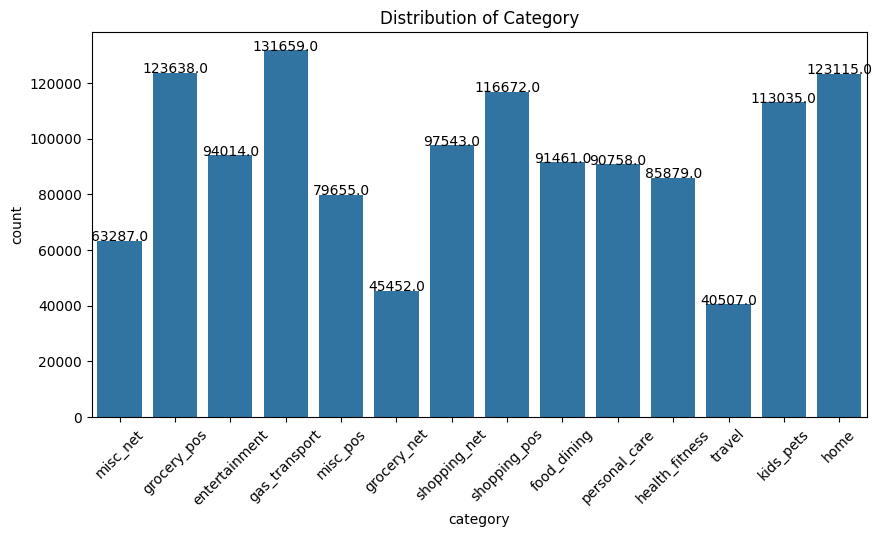

In [14]:
# Plot bar chart for 'category'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=processed_df_train, x='category')
plt.title('Distribution of Category')
plt.xticks(rotation=45)

# Add counts on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

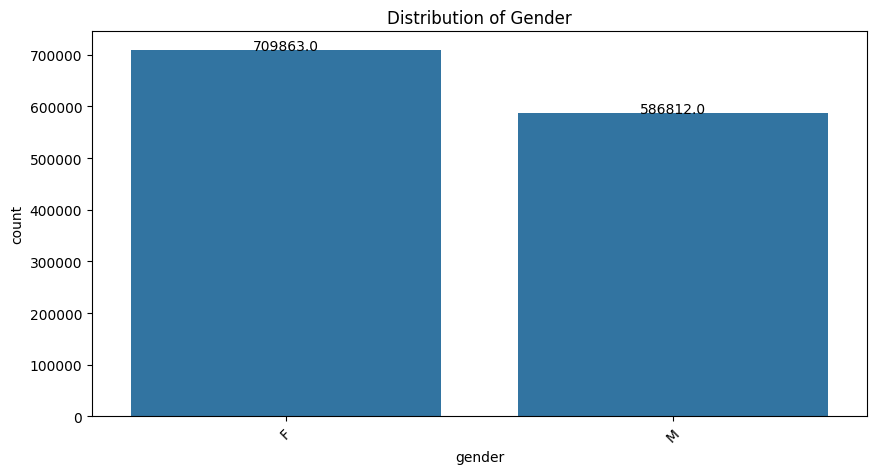

In [15]:
# Plot bar chart for 'gender'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=processed_df_train, x='gender')
plt.title('Distribution of Gender')
plt.xticks(rotation=45)

# Add counts on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

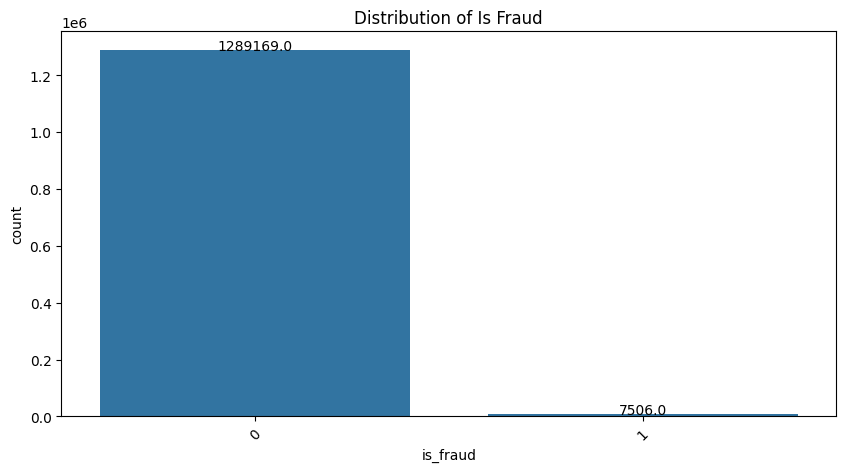

In [16]:
# Plot bar chart for 'is_fraud'
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=processed_df_train, x='is_fraud')
plt.title('Distribution of Is Fraud')
plt.xticks(rotation=45)

# Add counts on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

In [17]:
processed_df_train

,category,amt,gender,city_pop,is_fraud,trans_day_of_week,trans_month,time_of_day,age,last_purchased_secs,distance_last_purchase,same_merchant_with_last_purchase
0,misc_net,4.97,F,3495,0,Tuesday,January,0.000000,30,NaN,NaN,False
1,grocery_pos,107.23,F,149,0,Tuesday,January,0.000000,40,NaN,NaN,False
2,entertainment,220.11,M,4154,0,Tuesday,January,0.000000,56,NaN,NaN,False
3,gas_transport,45.00,M,1939,0,Tuesday,January,0.000694,51,NaN,NaN,False
4,misc_pos,41.96,M,99,0,Tuesday,January,0.002083,32,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,258,0,Sunday,June,0.508333,58,16781.0,112.032046,False
1296671,food_dining,51.70,M,100,0,Sunday,June,0.508333,40,7962.0,94.988187,False
1296672,food_dining,105.93,M,899,0,Sunday,June,0.508333,52,29074.0,177.104191,False
1296673,food_dining,74.90,M,1126,0,Sunday,June,0.509028,39,91018.0,118.969517,False


In [19]:
processed_df_train

,category,amt,gender,city_pop,is_fraud,trans_day_of_week,trans_month,time_of_day,age,last_purchased_secs,distance_last_purchase,same_merchant_with_last_purchase
0,misc_net,4.97,F,3495,0,Tuesday,January,0.000000,30,NaN,NaN,False
1,grocery_pos,107.23,F,149,0,Tuesday,January,0.000000,40,NaN,NaN,False
2,entertainment,220.11,M,4154,0,Tuesday,January,0.000000,56,NaN,NaN,False
3,gas_transport,45.00,M,1939,0,Tuesday,January,0.000694,51,NaN,NaN,False
4,misc_pos,41.96,M,99,0,Tuesday,January,0.002083,32,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,M,258,0,Sunday,June,0.508333,58,16781.0,112.032046,False
1296671,food_dining,51.70,M,100,0,Sunday,June,0.508333,40,7962.0,94.988187,False
1296672,food_dining,105.93,M,899,0,Sunday,June,0.508333,52,29074.0,177.104191,False
1296673,food_dining,74.90,M,1126,0,Sunday,June,0.509028,39,91018.0,118.969517,False


In [21]:
import pandas as pd
import numpy as np

# Fill NaN values with a large number for binning purposes
processed_df_train['last_purchased_secs'].fillna(np.inf, inplace=True)
processed_df_train['distance_last_purchase'].fillna(np.inf, inplace=True)

# Convert 'last_purchased_secs' to days
processed_df_train['last_purchased_days'] = processed_df_train['last_purchased_secs'] / (24 * 3600)

# Define bin edges and labels for 'last_purchased_days'
bins_days = [0, 1, 2, 3, np.inf]
labels_days = ['1 day', '2 days', '3 days', 'Over 3 days']

# Bin the 'last_purchased_days' data
processed_df_train['last_purchased_days_binned'] = pd.cut(processed_df_train['last_purchased_days'], bins=bins_days, labels=labels_days, right=False)

# Create a table for 'last_purchased_days'
table_days = processed_df_train['last_purchased_days_binned'].value_counts().sort_index().reset_index()
table_days.columns = ['Last Purchased (days)', 'Frequency']

# Define bin edges and labels for 'distance_last_purchase'
bins_distance = [0, 25, 50, 75, 100, np.inf]
labels_distance = ['<25 km', '25-50 km', '50-75 km', '75-100 km', '>100 km']

# Bin the 'distance_last_purchase' data
processed_df_train['distance_last_purchase_binned'] = pd.cut(processed_df_train['distance_last_purchase'], bins=bins_distance, labels=labels_distance, right=False)

# Create a table for 'distance_last_purchase'
table_distance = processed_df_train['distance_last_purchase_binned'].value_counts().sort_index().reset_index()
table_distance.columns = ['Distance Last Purchase (km)', 'Frequency']

# Display the tables
print("Table for Last Purchased (in days):")
print(table_days)

print("\nTable for Distance Last Purchase (in km):")
print(table_distance)

Table for Last Purchased (in days):
  Last Purchased (days)  Frequency
0                 1 day    1187752
1                2 days      80878
2                3 days      17621
3           Over 3 days       9441

Table for Distance Last Purchase (in km):
  Distance Last Purchase (km)  Frequency
0                      <25 km      59353
1                    25-50 km     150495
2                    50-75 km     205451
3                   75-100 km     225426
4                     >100 km     654967


In [22]:
import pandas as pd

# Define bin edges and labels for 'last_purchased_days'
bins_days = [0, 1, 2, 3, np.inf]
labels_days = ['1 day', '2 days', '3 days', 'Over 4 days']

# Bin the 'last_purchased_days' data
processed_df_train['last_purchased_days_binned'] = pd.cut(processed_df_train['last_purchased_days'], bins=bins_days, labels=labels_days, right=False)

# Create a table for 'last_purchased_days'
table_days = processed_df_train['last_purchased_days_binned'].value_counts().sort_index().reset_index()
table_days.columns = ['Last Purchased (days)', 'Frequency']

# Define bin edges and labels for 'distance_last_purchase'
bins_distance = [0, 25, 50, 75, 100, np.inf]
labels_distance = ['<25 km', '25-50 km', '50-75 km', '75-100 km', '>100 km']

# Bin the 'distance_last_purchase' data
processed_df_train['distance_last_purchase_binned'] = pd.cut(processed_df_train['distance_last_purchase'], bins=bins_distance, labels=labels_distance, right=False)

# Create a table for 'distance_last_purchase'
table_distance = processed_df_train['distance_last_purchase_binned'].value_counts().sort_index().reset_index()
table_distance.columns = ['Distance Last Purchase (km)', 'Frequency']

# Display the tables
print("Table for Last Purchased (in days):")
print(table_days)

print("\nTable for Distance Last Purchase (in km):")
print(table_distance)

Table for Last Purchased (in days):
  Last Purchased (days)  Frequency
0                 1 day    1187752
1                2 days      80878
2                3 days      17621
3           Over 4 days       9441

Table for Distance Last Purchase (in km):
  Distance Last Purchase (km)  Frequency
0                      <25 km      59353
1                    25-50 km     150495
2                    50-75 km     205451
3                   75-100 km     225426
4                     >100 km     654967


/var/folders/69/msdphlm56791c06wfjlc53n80000gn/T/ipykernel_43774/2951044393.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table_days = processed_df_train.groupby('last_purchased_days_binned')['is_fraud'].agg(['count', 'sum']).reset_index()
/var/folders/69/msdphlm56791c06wfjlc53n80000gn/T/ipykernel_43774/2951044393.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table_distance = processed_df_train.groupby('distance_last_purchase_binned')['is_fraud'].agg(['count', 'sum']).reset_index()


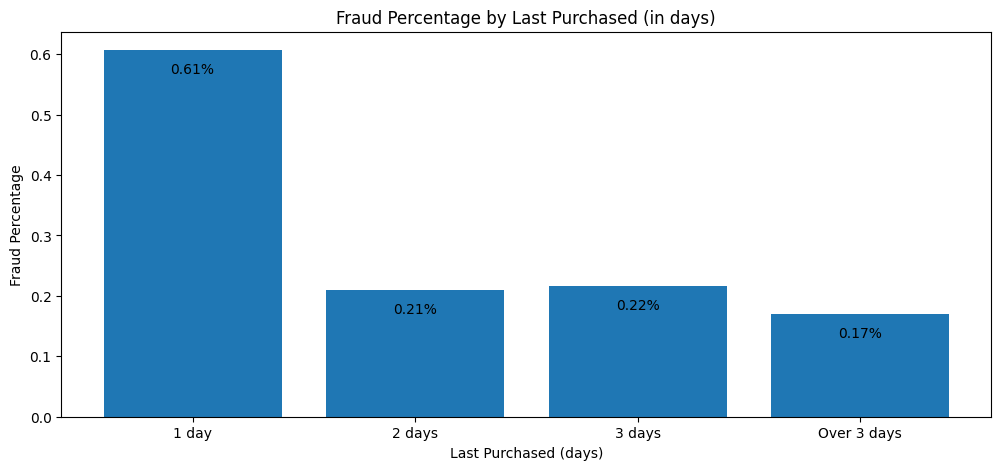

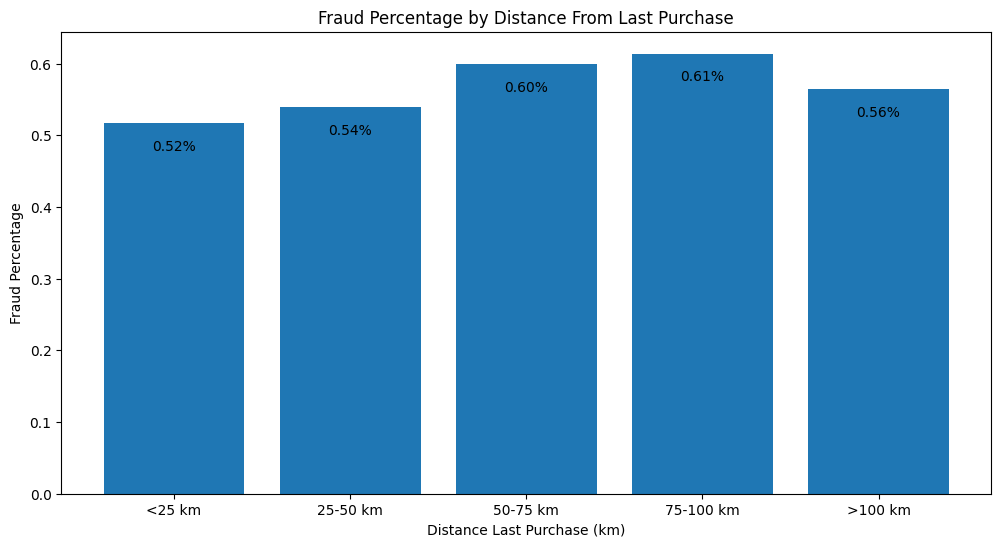

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fill NaN values with a large number for binning purposes
processed_df_train['last_purchased_secs'].fillna(np.inf, inplace=True)
processed_df_train['distance_last_purchase'].fillna(np.inf, inplace=True)

# Convert 'last_purchased_secs' to days
processed_df_train['last_purchased_days'] = processed_df_train['last_purchased_secs'] / (24 * 3600)

# Define bin edges and labels for 'last_purchased_days'
bins_days = [0, 1, 2, 3, np.inf]
labels_days = ['1 day', '2 days', '3 days', 'Over 3 days']

# Bin the 'last_purchased_days' data
processed_df_train['last_purchased_days_binned'] = pd.cut(processed_df_train['last_purchased_days'], bins=bins_days, labels=labels_days, right=False)

# Create a table for 'last_purchased_days' with fraud percentages
table_days = processed_df_train.groupby('last_purchased_days_binned')['is_fraud'].agg(['count', 'sum']).reset_index()
table_days.columns = ['Last Purchased (days)', 'Frequency', 'Fraud']
table_days['Fraud Percentage'] = (table_days['Fraud'] / table_days['Frequency']) * 100

# Define bin edges and labels for 'distance_last_purchase'
bins_distance = [0, 25, 50, 75, 100, np.inf]
labels_distance = ['<25 km', '25-50 km', '50-75 km', '75-100 km', '>100 km']

# Bin the 'distance_last_purchase' data
processed_df_train['distance_last_purchase_binned'] = pd.cut(processed_df_train['distance_last_purchase'], bins=bins_distance, labels=labels_distance, right=False)

# Create a table for 'distance_last_purchase' with fraud percentages
table_distance = processed_df_train.groupby('distance_last_purchase_binned')['is_fraud'].agg(['count', 'sum']).reset_index()
table_distance.columns = ['Distance Last Purchase (km)', 'Frequency', 'Fraud']
table_distance['Fraud Percentage'] = (table_distance['Fraud'] / table_distance['Frequency']) * 100

# Plot 'last_purchased_days'
plt.figure(figsize=(12, 5))
bars = plt.bar(table_days['Last Purchased (days)'], table_days['Fraud Percentage'])
plt.title('Fraud Percentage by Last Purchased (in days)')
plt.xlabel('Last Purchased (days)')
plt.ylabel('Fraud Percentage')

# Add percentages inside the bars
ax = plt.gca()
ylim = ax.get_ylim()
for bar in bars:
    yval = bar.get_height()
    label_position = yval - (ylim[1] * 0.05) if yval > (ylim[1] * 0.1) else yval + (ylim[1] * 0.05)
    plt.text(bar.get_x() + bar.get_width()/2, label_position, f'{yval:.2f}%', ha='center', va='center', color='black')

plt.show()

# Plot 'distance_last_purchase'
plt.figure(figsize=(12, 6))
bars = plt.bar(table_distance['Distance Last Purchase (km)'], table_distance['Fraud Percentage'])
plt.title('Fraud Percentage by Distance From Last Purchase')
plt.xlabel('Distance Last Purchase (km)')
plt.ylabel('Fraud Percentage')

# Add percentages inside the bars
ax = plt.gca()
ylim = ax.get_ylim()
for bar in bars:
    yval = bar.get_height()
    label_position = yval - (ylim[1] * 0.05) if yval > (ylim[1] * 0.1) else yval + (ylim[1] * 0.05)
    plt.text(bar.get_x() + bar.get_width()/2, label_position, f'{yval:.2f}%', ha='center', va='center', color='black')

plt.show()

/var/folders/69/msdphlm56791c06wfjlc53n80000gn/T/ipykernel_38263/3730633675.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_distance = processed_df_train[processed_df_train['is_fraud'] == 1].groupby('distance_last_purchase_binned').size()


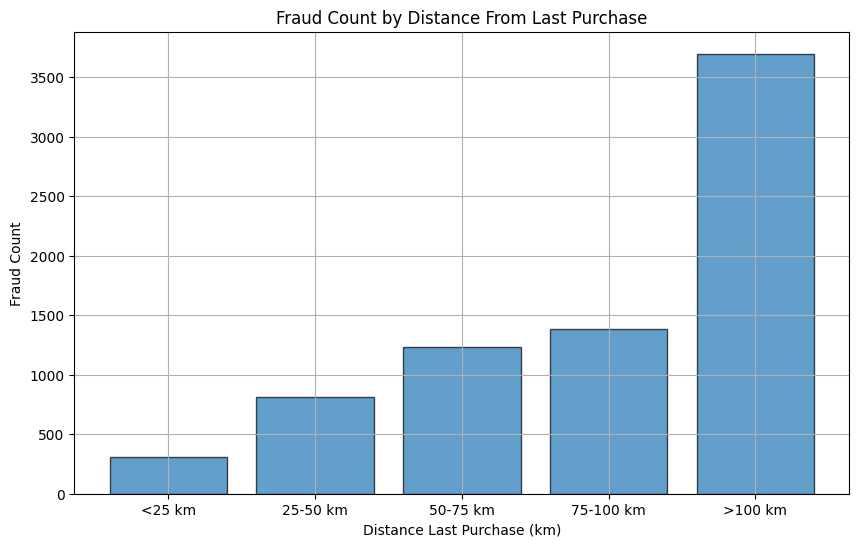

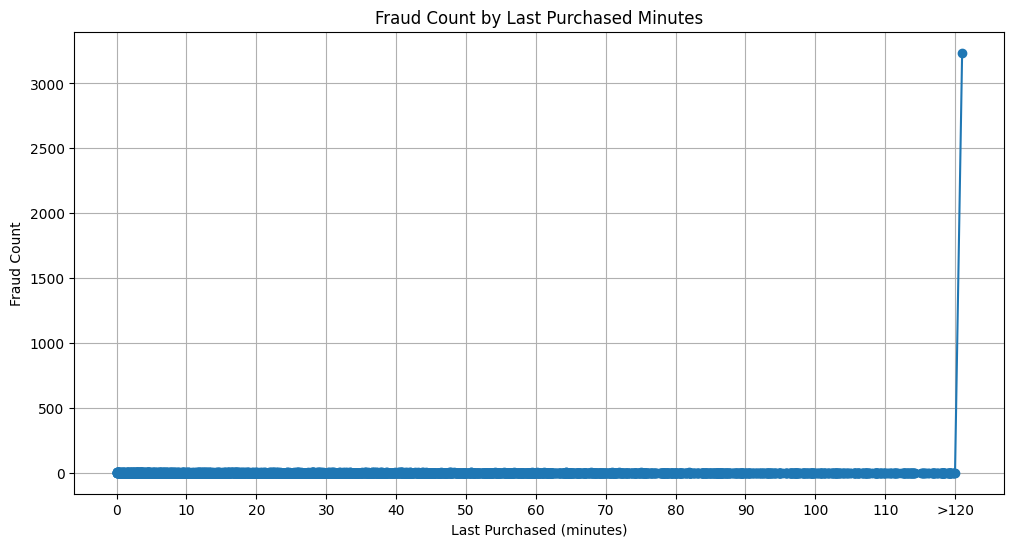

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define bin edges and labels for 'distance_last_purchase'
bins_distance = [0, 25, 50, 75, 100, np.inf]
labels_distance = ['<25 km', '25-50 km', '50-75 km', '75-100 km', '>100 km']

# Bin the 'distance_last_purchase' data
processed_df_train['distance_last_purchase_binned'] = pd.cut(processed_df_train['distance_last_purchase'], bins=bins_distance, labels=labels_distance, right=False)

# Group by the binned columns and count the number of fraud cases
fraud_by_distance = processed_df_train[processed_df_train['is_fraud'] == 1].groupby('distance_last_purchase_binned').size()

# Plot the fraud count by distance last purchase
plt.figure(figsize=(10, 6))
bars_distance = plt.bar(fraud_by_distance.index, fraud_by_distance.values, edgecolor='k', alpha=0.7)
plt.title('Fraud Count by Distance From Last Purchase')
plt.xlabel('Distance Last Purchase (km)')
plt.ylabel('Fraud Count')
plt.grid(True)
plt.show()

# Convert 'last_purchased_days' to minutes
processed_df_train['last_purchased_minutes'] = processed_df_train['last_purchased_days'] * 24 * 60

# Limit to up to 2 hours (120 minutes) and aggregate the rest
processed_df_train['last_purchased_minutes_binned'] = np.where(processed_df_train['last_purchased_minutes'] <= 120,
                                                               processed_df_train['last_purchased_minutes'],
                                                               121)

# Group by 'last_purchased_minutes_binned' and count the number of fraud cases
fraud_by_minutes = processed_df_train[processed_df_train['is_fraud'] == 1].groupby('last_purchased_minutes_binned').size()

# Plot the fraud count by last purchased minutes
plt.figure(figsize=(12, 6))
plt.plot(fraud_by_minutes.index, fraud_by_minutes.values, marker='o')
plt.title('Fraud Count by Last Purchased Minutes')
plt.xlabel('Last Purchased (minutes)')
plt.ylabel('Fraud Count')
plt.grid(True)

# Set x-ticks to show fewer labels
plt.xticks(np.arange(0, 122, 10), labels=[str(i) for i in range(0, 120, 10)] + ['>120'])

plt.show()

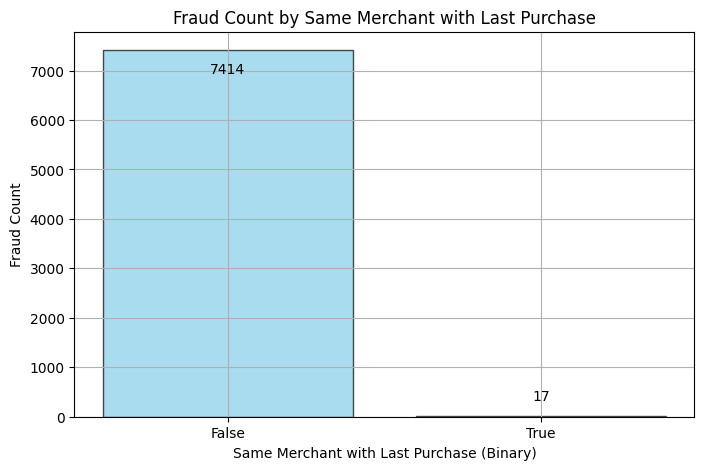

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has 'same_merchant_with_last_purchase' and 'is_fraud' columns

# Group by 'same_merchant_with_last_purchase' and count the number of fraud cases
fraud_by_same_merchant = processed_df_train[processed_df_train['is_fraud'] == 1].groupby('same_merchant_with_last_purchase').size()

# Plot the fraud count by same_merchant_with_last_purchase
plt.figure(figsize=(8, 5))
bars = plt.bar(fraud_by_same_merchant.index.astype(str), fraud_by_same_merchant.values, color=['skyblue', 'lightcoral'], edgecolor='k', alpha=0.7)
plt.title('Fraud Count by Same Merchant with Last Purchase')
plt.xlabel('Same Merchant with Last Purchase (Binary)')
plt.ylabel('Fraud Count')
plt.grid(True)

# Add number labels on each bar
ax = plt.gca()
ylim = ax.get_ylim()
for bar in bars:
    yval = bar.get_height()
    label_position = yval - (ylim[1] * 0.05) if yval > (ylim[1] * 0.1) else yval + (ylim[1] * 0.05)
    plt.text(bar.get_x() + bar.get_width()/2, label_position, f'{int(yval)}', ha='center', va='center', color='black')

plt.show()